In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('Groceries_dataset.csv')
dados.columns = [x.lower() for x in dados.columns]
dados

,member_number,date,itemdescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# Regras de associação

Regras de associação são uma técnica muito utilizada na mineração de dados para descobrir relações interessantes entre variáveis em grandes bancos de dados. Elas são utilizadas para identificar e prever padrões e tendências, comum em análises de cestas de compras (market basket analysis) em que se busca entender o comportamento de compra do consumidor.

Uma regra de associação é geralmente expressa na forma "Se/Então" (If/Then), por exemplo:

* Se um cliente compra pão e manteiga, então ele também compra leite.

Na formulação dessa regra, "pão e manteiga" seriam o antecedente (ou premissa) e "leite" o consequente (ou conclusão).

Existem três métricas principais para medir a qualidade e a força de uma regra de associação:

1. Suporte (Support): Indica a frequência com que os itens aparecem juntos no dataset. Por exemplo, o suporte da regra acima seria a porcentagem de todas as transações que contêm pão, manteiga e leite.

2. Confiança (Confidence): Mede a probabilidade de o consequente ser comprado quando o antecedente é comprado. No exemplo, seria a proporção de transações com pão e manteiga que também contêm leite.

3. Lift (Elevação): Indica a força da associação entre o antecedente e o consequente. É calculado dividindo a confiança pela frequência do consequente em todas as transações. Um lift maior que 1 indica que o antecedente e o consequente são mais prováveis de ocorrerem juntos do que seriam independentemente.

Para gerar regras de associação, um dos algoritmos mais conhecidos é o Apriori. O Apriori utiliza um processo iterativo onde, em cada passo, combinações de itens são verificadas quanto ao seu suporte, e somente aquelas que satisfazem um mínimo suporte pré-definido são consideradas para o próximo passo, onde são combinadas com outros itens. As combinações que não atingem o suporte mínimo são podadas, o que significa que não são consideradas em iterações subsequentes. Isso ajuda a reduzir a quantidade de combinações a serem verificadas, otimizando o processo.

Regras de associação são aplicadas em várias áreas, como marketing, bioinformática, análise de redes sociais, e até mesmo para recomendação de produtos em sites de e-commerce.

## Exemplo

Imagine que temos um dataset que representa as compras de cinco clientes diferentes:

* Cliente 1: Leite, Pão
* Cliente 2: Cerveja, Pão, Fraldas
* Cliente 3: Leite, Fraldas, Cerveja, Pão
* Cliente 4: Leite, Pão
* Cliente 5: Fraldas, Cerveja

Primeiro, vamos estabelecer o suporte mínimo para as regras de associação. Para este exemplo, vamos definir que o suporte mínimo é de 60%. Ou seja, estamos interessados apenas em itens que apareçam em pelo menos 60% das transações. Além disso, vamos definir uma confiança mínima de 80%.

1. Calcular o suporte para cada item:

* Leite: 3/5 transações = 60%
* Pão: 4/5 transações = 80%
* Cerveja: 3/5 transações = 60%
* Fraldas: 3/5 transações = 60%

2. Calcular o suporte para combinações de itens:

* Leite e Pão: 2/5 transações = 40%
* Cerveja e Pão: 2/5 transações = 40%
* Cerveja e Fraldas: 3/5 transações = 60%
* Leite, Cerveja e Pão: 1/5 transações = 20%

... (e assim por diante para outras combinações)

3. Identificar combinações com suporte acima do mínimo (no caso, 60%):

* Leite (60%)
* Pão (80%)
* Cerveja (60%)
* Fraldas (60%)
* Cerveja e Fraldas (60%)

4. Gerar regras de associação e calcular a confiança:

Agora, vamos olhar para as combinações que têm suporte suficiente e formular regras. Por exemplo, sabemos que "Cerveja e Fraldas" tem suporte de 60%, então podemos formar uma regra:

* Regra: Se um cliente compra Cerveja, então ele também compra Fraldas.

Para calcular a confiança desta regra, olhamos para quantas vezes Cerveja e Fraldas foram compradas juntas (3 vezes) dividido pelo número de vezes que Cerveja foi comprada no total (3 vezes), o que nos dá uma confiança de 100%.

5. Verificar se a confiança atende ao mínimo:

A confiança da regra "Se Cerveja, então Fraldas" é de 100%, o que está acima do nosso limiar de 80%.

6. Calcular o lift (se necessário):

* Para calcular o lift da regra, dividimos a confiança da regra pela frequência geral de Fraldas.
* Lift = Confiança da regra / Suporte de Fraldas = 100% / 60% = 1.67

Um lift de 1.67 indica que é 1.67 vezes mais provável que Cerveja e Fraldas sejam compradas juntas do que apenas Fraldas, indicando uma relação positiva entre a compra de Cerveja e a compra de Fraldas.

Assim, poderíamos concluir que há uma regra de associação forte entre Cerveja e Fraldas em nossa pequena base de dados, indicando que quando um cliente compra Cerveja, há uma boa chance de que ele também compre Fraldas.

Este conhecimento poderia ser utilizado, por exemplo, para a colocação estratégica de produtos dentro de um supermercado.


In [3]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   member_number    38765 non-null  int64 
 1   date             38765 non-null  object
 2   itemdescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [4]:
dados['date'] = pd.to_datetime(dados['date'], format='%d-%m-%Y')
transactions = dados.groupby(['member_number', 'date'])['itemdescription'].apply(list).reset_index(name='items')
transactions

,member_number,date,items
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"
...,...,...,...
14958,4999,2015-05-16,"[butter milk, whipped/sour cream]"
14959,4999,2015-12-26,"[bottled water, herbs]"
14960,5000,2014-03-09,"[fruit/vegetable juice, onions]"
14961,5000,2014-11-16,"[bottled beer, other vegetables]"


In [5]:
one_hot_encoded_data = transactions['items'].str.join('|').str.get_dummies()
one_hot_encoded_data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
one_hot_encoded_data = transactions[['member_number', 'date']].join(one_hot_encoded_data)
one_hot_encoded_data

,member_number,date,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,2014-06-24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1000,2015-03-15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,1000,2015-05-27,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1000,2015-07-24,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1000,2015-11-25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,4999,2015-05-16,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
14959,4999,2015-12-26,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,5000,2014-03-09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,5000,2014-11-16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Algoritmo Apriori

O algoritmo Apriori é um método clássico na mineração de dados usado para identificar conjuntos de itens frequentes e regras de associação em bancos de dados de transações. 

Ele funciona através de um processo iterativo que constrói candidatos a conjuntos de itens frequentes a partir de itens individuais e, em seguida, verifica o suporte desses conjuntos, eliminando aqueles que não atendem a um suporte mínimo pré-definido. 

O algoritmo utiliza a propriedade de que todos os subconjuntos de um conjunto de itens frequentes também devem ser frequentes, o que permite a poda eficiente do espaço de busca. 

Após encontrar todos os conjuntos de itens frequentes, o Apriori pode gerar regras de associação, que são avaliadas com base na confiança e em outras métricas para encontrar as mais significativas. 

Embora possa ser ineficiente em grandes datasets devido à necessidade de várias varreduras e à geração de muitos candidatos a conjuntos de itens, o Apriori é fundamental para entender a mineração de regras de associação.

### Calculando o Suporte

Para o algoritmo Apriori, o primeiro passo é encontrar todos os itemsets frequentes que têm um suporte maior que o limiar mínimo (definido pelo usuário).

Suponha que você queira um suporte mínimo de 1% (min_support=0.01)

In [7]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(one_hot_encoded_data.iloc[:,2:], min_support=0.005, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))  
frequent_itemsets


d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 5\venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets,length
0,0.021386,(UHT-milk),1
1,0.008087,(baking powder),1
2,0.033950,(beef),1
3,0.021787,(berries),1
4,0.016574,(beverages),1
...,...,...,...
121,0.011629,"(soda, whole milk)",2
122,0.005814,"(soda, yogurt)",2
123,0.008220,"(whole milk, tropical fruit)",2
124,0.005213,"(yogurt, tropical fruit)",2


In [8]:
frequent_itemsets.sort_values(by = 'support',ascending=False)

,support,itemsets,length
87,0.157923,(whole milk),1
53,0.122101,(other vegetables),1
66,0.110005,(rolls/buns),1
75,0.097106,(soda),1
88,0.085879,(yogurt),1
...,...,...,...
58,0.005280,(photo/film),1
124,0.005213,"(yogurt, tropical fruit)",2
95,0.005146,"(frankfurter, other vegetables)",2
107,0.005012,"(whole milk, pork)",2


In [9]:
single_items = frequent_itemsets[frequent_itemsets['length'] == 1]
single_items.sort_values(by = 'support',ascending=False)

,support,itemsets,length
87,0.157923,(whole milk),1
53,0.122101,(other vegetables),1
66,0.110005,(rolls/buns),1
75,0.097106,(soda),1
88,0.085879,(yogurt),1
...,...,...,...
65,0.005480,(roll products ),1
14,0.005480,(canned vegetables),1
82,0.005347,(turkey),1
58,0.005280,(photo/film),1


In [10]:
pair_items = frequent_itemsets[frequent_itemsets['length'] == 2]
pair_items.sort_values(by = 'support',ascending=False)

,support,itemsets,length
103,0.014837,"(whole milk, other vegetables)",2
112,0.013968,"(rolls/buns, whole milk)",2
121,0.011629,"(soda, whole milk)",2
125,0.011161,"(whole milk, yogurt)",2
98,0.010559,"(rolls/buns, other vegetables)",2
101,0.009691,"(soda, other vegetables)",2
117,0.008955,"(sausage, whole milk)",2
123,0.008220,"(whole milk, tropical fruit)",2
110,0.008087,"(rolls/buns, soda)",2
104,0.008087,"(yogurt, other vegetables)",2


### Calculando a Confiança

Depois de encontrar os itemsets frequentes, o próximo passo é calcular a confiança das regras de associação. A confiança de uma regra A para B é definida como o suporte de A e B dividido pelo suporte de A

In [11]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules[['antecedents', 'consequents', 'support', 'confidence']].sort_values(by = 'confidence',ascending=False)

,antecedents,consequents,support,confidence
0,(bottled beer),(whole milk),0.007151,0.157817
14,(sausage),(whole milk),0.008955,0.148394
7,(newspapers),(whole milk),0.005614,0.144330
4,(domestic eggs),(whole milk),0.005280,0.142342
6,(frankfurter),(whole milk),0.005280,0.139823
5,(frankfurter),(other vegetables),0.005146,0.136283
11,(pork),(whole milk),0.005012,0.135135
10,(pip fruit),(whole milk),0.006616,0.134877
3,(citrus fruit),(whole milk),0.007151,0.134591
15,(shopping bags),(whole milk),0.006349,0.133427


### Lift

O lift é uma medida que compara a confiança de uma regra de associação com a expectativa de confiança, assumindo que os itens são independentes.

Um lift maior que 1 indica que os itens são mais prováveis de serem comprados juntos do que seriam aleatoriamente, um lift menor que 1 indica que os itens são menos prováveis de serem comprados juntos, e um lift igual a 1 indica que os itens são independentes.

In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules[['antecedents', 'consequents', 'support', 'confidence','lift']].sort_values(by = 'lift', ascending=False)

,antecedents,consequents,support,confidence,lift
0,(frankfurter),(other vegetables),0.005146,0.136283,1.116150
1,(other vegetables),(frankfurter),0.005146,0.042146,1.116150
4,(sausage),(yogurt),0.005748,0.095238,1.108986
5,(yogurt),(sausage),0.005748,0.066926,1.108986
2,(sausage),(soda),0.005948,0.098560,1.014975
3,(soda),(sausage),0.005948,0.061253,1.014975


------------------------

## Análise RFM

A análise RFM (Recency, Frequency, Monetary value) é uma técnica de segmentação de clientes usada para identificar quais clientes são os mais valiosos para um negócio através da análise de três dimensões quantitativas:

1. Recency (R) - Quão recentemente um cliente fez uma compra. Um cliente que comprou recentemente é mais provável que compre novamente em comparação com um cliente que não compra há muito tempo.

2. Frequency (F) - Com que frequência um cliente faz uma compra dentro de um determinado período de tempo. Clientes que compram com mais frequência têm maior engajamento e são considerados mais leais.

3. Monetary value (M) - Quanto dinheiro um cliente gastou durante um período de tempo. Clientes que gastam mais são muitas vezes considerados mais valiosos.

Para realizar uma análise RFM, uma empresa deve seguir estes passos:

1. Coletar dados: Reunir dados de cada cliente relacionados a recency, frequency e monetary value.

2. Calcular RFM scores: Atribuir uma pontuação para cada cliente baseada nas três dimensões. Frequentemente, as pontuações são baseadas em percentis ou em divisões (por exemplo, numa escala de 1 a 5).

3. Segmentar clientes: Dividir os clientes em segmentos com base nas pontuações RFM. Por exemplo, um segmento pode consistir de clientes com alta recency, alta frequency e alto monetary value (frequentemente chamados de "clientes VIP").

4. Desenvolver estratégias de marketing: Criar estratégias personalizadas para cada segmento. Por exemplo, clientes com alta recency mas baixa frequency podem precisar de incentivos para comprar mais frequentemente.

A análise RFM é especialmente poderosa porque é simples, de custo relativamente baixo e fortemente orientada por dados. Ela permite que as empresas priorizem recursos de marketing e desenvolvam estratégias diferenciadas para manter e cultivar o relacionamento com diferentes tipos de clientes.

In [13]:
dados2 = pd.read_excel('Assignment-1_Data.xlsx')
dados2.columns = [x.lower() for x in dados2.columns]

In [14]:
dados2

,billno,itemname,quantity,date,price,customerid,country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [15]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   billno      522064 non-null  object        
 1   itemname    520609 non-null  object        
 2   quantity    522064 non-null  int64         
 3   date        522064 non-null  datetime64[ns]
 4   price       522064 non-null  float64       
 5   customerid  388023 non-null  float64       
 6   country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


### Recency

In [16]:
last_date = dados2.date.max()
rec_table = dados2.groupby(["customerid"]).agg({"date": lambda x: ((last_date - x.max()).days)})
rec_table.columns = ["recency"]
rec_table = rec_table.reset_index()
rec_table.head()

,customerid,recency
0,12346.0,325
1,12347.0,1
2,12349.0,18
3,12350.0,309
4,12352.0,35


### Frequency

In [17]:
freq_table = dados2.drop_duplicates(subset = "billno").groupby(["customerid"])[["billno"]].count()
freq_table.columns = ["frequency"]
freq_table = freq_table.reset_index()
freq_table.head()

,customerid,frequency
0,12346.0,1
1,12347.0,7
2,12349.0,1
3,12350.0,1
4,12352.0,8


### Monetary

In [18]:
dados2['total_price'] = dados2.quantity*dados2.price
monetary_table = dados2.groupby(["customerid"])[["total_price"]].sum()
monetary_table.columns = ["monetary"]
monetary_table = monetary_table.reset_index()
monetary_table.head()

,customerid,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12349.0,1757.55
3,12350.0,334.40
4,12352.0,2506.04


In [19]:
rfm_data = pd.merge(rec_table,freq_table,on = 'customerid',how = 'left')
rfm_data = pd.merge(rfm_data,monetary_table,on = 'customerid',how = 'left')
rfm_data.head()

,customerid,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12349.0,18,1,1757.55
3,12350.0,309,1,334.40
4,12352.0,35,8,2506.04


In [20]:
rfm_data.describe()

,customerid,recency,frequency,monetary
count,4297.000000,4297.00000,4297.000000,4297.000000
mean,15315.691180,91.61252,4.226902,1993.140888
std,1716.241594,100.14893,7.090722,8588.143093
min,12346.000000,0.00000,1.000000,0.000000
25%,13831.000000,17.00000,1.000000,306.720000
50%,15321.000000,50.00000,2.000000,668.580000
75%,16790.000000,142.00000,5.000000,1652.580000
max,18287.000000,373.00000,210.000000,280206.020000


## Clusterização sobre o RMF

### Modelos de misturas Gaussianos

In [21]:
from sklearn.preprocessing import MinMaxScaler
dados_rfm = rfm_data.copy()
scaler = MinMaxScaler()
x = scaler.fit_transform(dados_rfm.values)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
clusters = gmm.fit_predict(x)
dados_rfm['cluster_gmm'] = clusters
dados_rfm

,customerid,recency,frequency,monetary,cluster_gmm
0,12346.0,325,1,77183.60,1
1,12347.0,1,7,4310.00,4
2,12349.0,18,1,1757.55,4
3,12350.0,309,1,334.40,0
4,12352.0,35,8,2506.04,4
...,...,...,...,...,...
4292,18280.0,277,1,180.60,3
4293,18281.0,180,1,80.82,3
4294,18282.0,7,2,178.05,3
4295,18283.0,3,16,2094.88,2


<Axes: xlabel='recency', ylabel='frequency'>

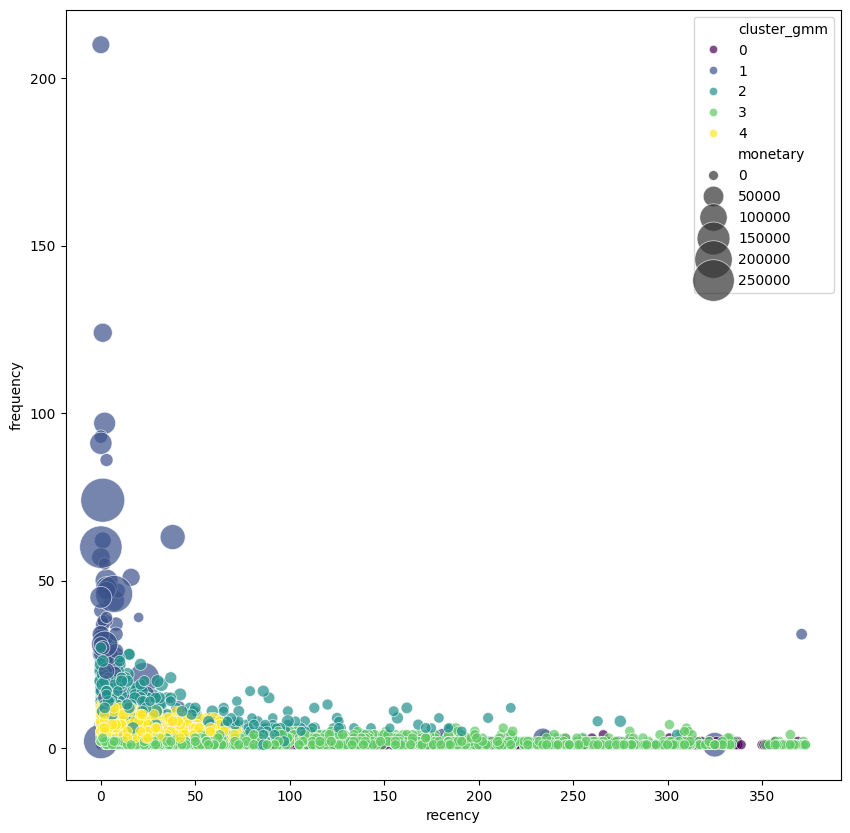

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(data=dados_rfm, x='recency', y='frequency', size='monetary', hue='cluster_gmm', palette='viridis', sizes=(50,1000), alpha=0.7)

In [23]:
import plotly.express as px
fig = px.scatter_3d(dados_rfm, 
                    x='recency', 
                    y='frequency', 
                    z='monetary', 
                    color='cluster_gmm', 
                    size_max=100,
                    color_continuous_scale='viridis')
fig.write_html("rfm_analysis.html")
fig.show()

In [24]:
dados_rfm

,customerid,recency,frequency,monetary,cluster_gmm
0,12346.0,325,1,77183.60,1
1,12347.0,1,7,4310.00,4
2,12349.0,18,1,1757.55,4
3,12350.0,309,1,334.40,0
4,12352.0,35,8,2506.04,4
...,...,...,...,...,...
4292,18280.0,277,1,180.60,3
4293,18281.0,180,1,80.82,3
4294,18282.0,7,2,178.05,3
4295,18283.0,3,16,2094.88,2


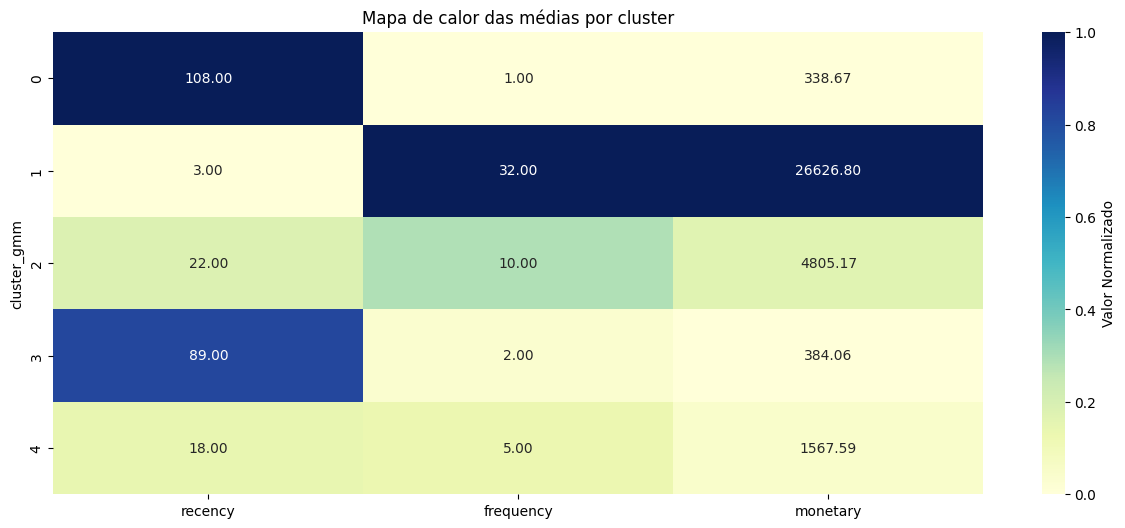

In [25]:
cluster_means = dados_rfm[['recency','frequency','monetary','cluster_gmm']].groupby('cluster_gmm').median()
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

### KMeans + Elbow Method

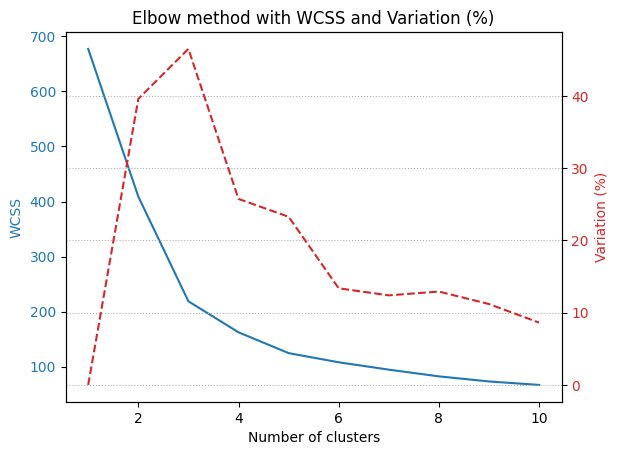

In [26]:
from sklearn.cluster import KMeans
from sklearn import metrics
wcss = []
# davies_bouldin_score = metrics.davies_bouldin_score(X, kmeans_model.labels_)

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
variations = [0]
for i in range(1, len(wcss)):
    variations.append((wcss[i-1] - wcss[i]) / wcss[i-1] * 100)
fig, ax1 = plt.subplots()

ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('WCSS', color='tab:blue')
ax1.plot(range(1, 11), wcss, color='tab:blue', label='WCSS')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()  # Segundo eixo y para as variações percentuais
ax2.set_ylabel('Variation (%)', color='tab:red')
ax2.plot(range(1, 11), variations, color='tab:red', label='Variation (%)', linestyle='--')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Elbow method with WCSS and Variation (%)')
plt.grid(ls=':')
plt.show()

In [27]:
scaler = MinMaxScaler()
kmeans = KMeans(n_clusters = 5, random_state = 2,init = 'k-means++')
kmeans.fit(x)
dados_rfm['cluster_kmeans'] = kmeans.labels_



d:\Drive Unesc\Meu Drive\2023-2\5af - Ciência de Dados\Notebooks\Unidade 5\venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



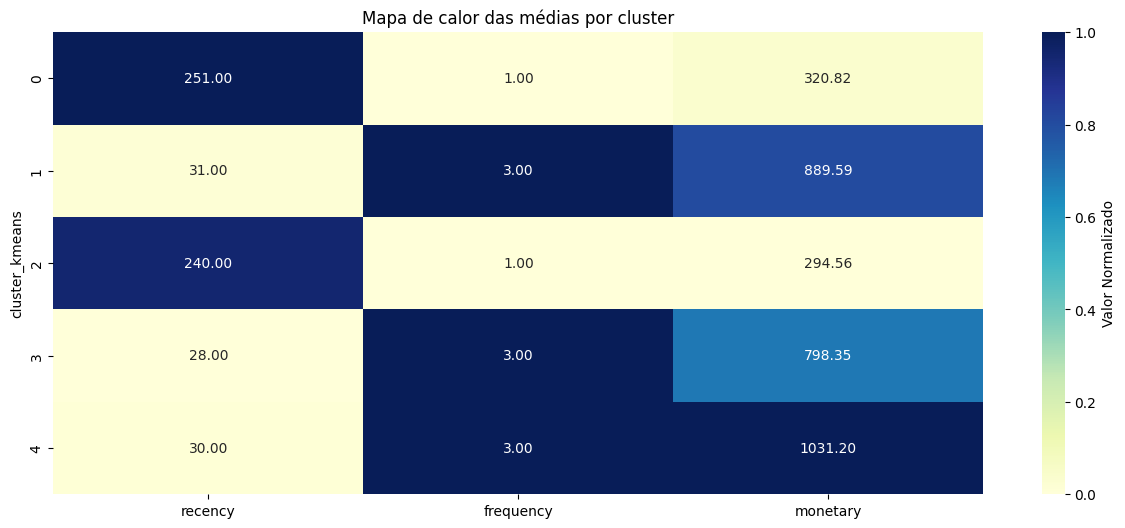

In [28]:
cluster_means = dados_rfm[['recency','frequency','monetary','cluster_kmeans']].groupby('cluster_kmeans').median()
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(15, 6))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

In [29]:
dados_rfm

,customerid,recency,frequency,monetary,cluster_gmm,cluster_kmeans
0,12346.0,325,1,77183.60,1,0
1,12347.0,1,7,4310.00,4,4
2,12349.0,18,1,1757.55,4,4
3,12350.0,309,1,334.40,0,0
4,12352.0,35,8,2506.04,4,4
...,...,...,...,...,...,...
4292,18280.0,277,1,180.60,3,2
4293,18281.0,180,1,80.82,3,2
4294,18282.0,7,2,178.05,3,3
4295,18283.0,3,16,2094.88,2,3


In [30]:
rfm = dados_rfm[['customerid','recency','frequency','monetary']]
rfm

,customerid,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12349.0,18,1,1757.55
3,12350.0,309,1,334.40
4,12352.0,35,8,2506.04
...,...,...,...,...
4292,18280.0,277,1,180.60
4293,18281.0,180,1,80.82
4294,18282.0,7,2,178.05
4295,18283.0,3,16,2094.88


### Pontuação RFM - Segmentação e categorização por quantis

In [31]:
import numpy as np

r_labels = range(5, 0, -1)  # Recency é melhor quanto menor for o número de dias
rfm['R'] = pd.qcut(rfm['recency'], q=5, labels=r_labels)

f_bins = np.linspace(0, rfm['frequency'].max(), 6)
f_bins[0] = -1  # Garante que o menor valor de frequency está incluído
f_labels = range(1, 6)
rfm['F'] = pd.cut(rfm['frequency'], bins=f_bins, labels=f_labels, include_lowest=True)

m_labels = range(1, 6)
rfm['M'] = pd.qcut(rfm['monetary'], q=5, labels=m_labels)

rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

C:\Users\necke\AppData\Local\Temp\ipykernel_24628\3873738924.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
rfm.sort_values(by = 'RFM_Score',ascending=False)

,customerid,recency,frequency,monetary,R,F,M,RFM_Score
304,12748.0,0,210,33719.73,5,5,5,555
3970,17841.0,1,124,40991.57,5,3,5,535
458,12971.0,3,86,11189.91,5,3,5,535
539,13089.0,2,97,58825.83,5,3,5,535
2139,15311.0,0,91,60767.90,5,3,5,535
...,...,...,...,...,...,...,...,...
4000,17881.0,303,1,133.35,1,1,1,111
549,13101.0,233,1,101.19,1,1,1,111
2536,15843.0,303,1,118.95,1,1,1,111
1518,14453.0,189,1,119.93,1,1,1,111


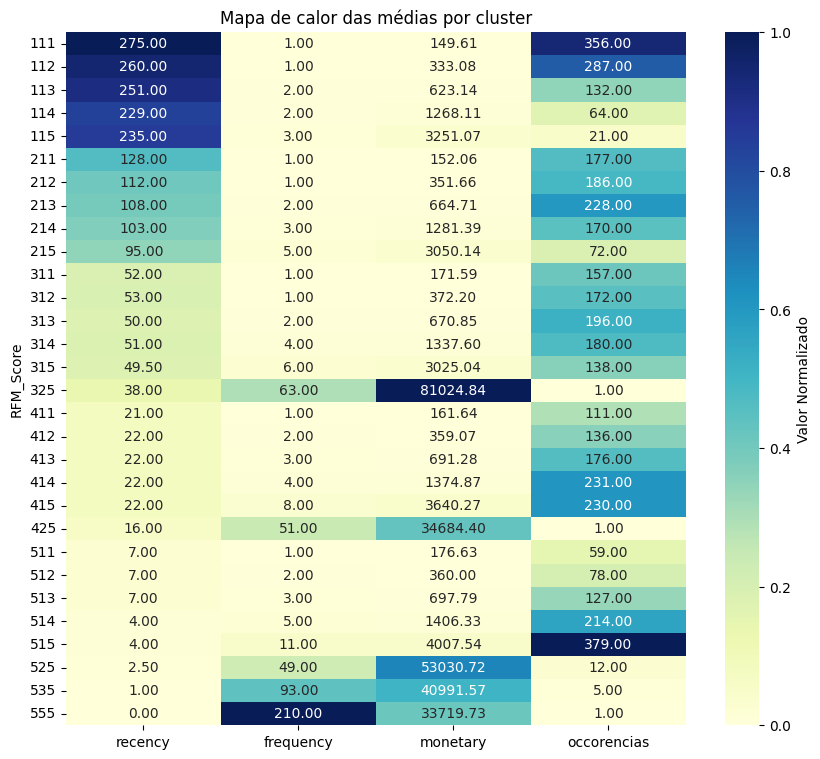

In [33]:
cluster_means = rfm[['recency','frequency','monetary','RFM_Score']].groupby('RFM_Score').agg(
    recency = ('recency','median'),
    frequency = ('frequency','median'),
    monetary = ('monetary','median'),
    occorencias = ('monetary','count')
)
normalized = (cluster_means - cluster_means.min()) / (cluster_means.max() - cluster_means.min())
plt.figure(figsize=(10, 9))
sns.heatmap(normalized, annot=cluster_means, fmt='.2f', cmap="YlGnBu", cbar_kws={'label': 'Valor Normalizado'})
plt.title('Mapa de calor das médias por cluster')
plt.show()

In [34]:
vip = rfm[rfm.RFM_Score=='515']
vip

,customerid,recency,frequency,monetary,R,F,M,RFM_Score
1,12347.0,1,7,4310.00,5,1,5,515
13,12362.0,2,10,5226.23,5,1,5,515
45,12417.0,2,9,3649.10,5,1,5,515
58,12433.0,0,7,13375.87,5,1,5,515
61,12437.0,1,18,4951.41,5,1,5,515
...,...,...,...,...,...,...,...,...
4257,18230.0,8,7,2810.20,5,1,5,515
4266,18241.0,9,17,2073.09,5,1,5,515
4268,18245.0,6,7,2567.06,5,1,5,515
4286,18272.0,2,6,3078.58,5,1,5,515


In [35]:
lista_vip = vip.customerid.unique().tolist()

In [36]:
dados_vip = dados2[dados2.customerid.isin(lista_vip)]
dados_vip

,billno,itemname,quantity,date,price,customerid,country,total_price
26,536370,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
27,536370,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France,90.0
28,536370,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,45.0
29,536370,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,10.2
30,536370,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France,15.6
...,...,...,...,...,...,...,...,...
522044,581585,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,23.4
522045,581586,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,23.6
522046,581586,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,30.0
522047,581586,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,214.8


In [40]:
transactions = dados_vip.groupby(['billno'])['itemname'].apply(list).reset_index(name='items')
transactions

,billno,items
0,536370,"[ALARM CLOCK BAKELIKE PINK, ALARM CLOCK BAKELI..."
1,536378,"[JUMBO BAG PINK POLKADOT, JUMBO BAG BAROQUE B..."
2,536390,"[CHRISTMAS LIGHTS 10 REINDEER, JAM MAKING SET ..."
3,536395,"[BLACK HEART CARD HOLDER, ASSORTED COLOUR BIRD..."
4,536397,"[SET OF 3 BLACK FLYING DUCKS, SET OF 3 COLOURE..."
...,...,...
4973,581582,"[BICYCLE PUNCTURE REPAIR KIT, CLASSIC BICYCLE ..."
4974,581583,"[LUNCH BAG RED RETROSPOT, 6 CHOCOLATE LOVE HEA..."
4975,581584,"[RED FLOCK LOVE HEART PHOTO FRAME, 6 CHOCOLATE..."
4976,581585,"[BLACK TEA TOWEL CLASSIC DESIGN, ASSORTED BOTT..."


In [44]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions['items']).transform(transactions['items'])
df = pd.DataFrame(te_ary, columns=te.columns_)



In [45]:
df

,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [46]:
frequent_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)

In [47]:
frequent_itemsets.sort_values(by = 'support',ascending = False)

,support,itemsets
27,0.120129,(JUMBO BAG RED RETROSPOT)
28,0.108477,(WHITE HANGING HEART T-LIGHT HOLDER)
14,0.095621,(LUNCH BAG RED RETROSPOT)
87,0.089192,(REGENCY CAKESTAND 3 TIER)
352,0.081358,(PARTY BUNTING)
...,...,...
1401,0.010044,"(JUMBO BAG VINTAGE LEAF, LUNCH BAG CARS BLUE)"
461,0.010044,(NATURAL SLATE CHALKBOARD LARGE)
161,0.010044,(CHRISTMAS PUDDING TRINKET POT)
1392,0.010044,"(LUNCH BAG DOILEY PATTERN, LUNCH BAG BLACK SK..."


In [58]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=25)
rules.sort_values(by = 'lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
42,(POPPY'S PLAYHOUSE LIVINGROOM),"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",0.014062,0.013660,0.010647,0.757143,55.427311,0.010455,4.061400,0.995963
39,"(POPPY'S PLAYHOUSE KITCHEN, POPPY'S PLAYHOUSE ...",(POPPY'S PLAYHOUSE LIVINGROOM),0.013660,0.014062,0.010647,0.779412,55.427311,0.010455,4.469586,0.995558
75,(REGENCY TEA PLATE GREEN),"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",0.016874,0.013459,0.011852,0.702381,52.185856,0.011625,3.314777,0.997673
74,"(REGENCY TEA PLATE PINK, REGENCY TEA PLATE ROSES)",(REGENCY TEA PLATE GREEN),0.013459,0.016874,0.011852,0.880597,52.185856,0.011625,8.233678,0.994219
76,(REGENCY TEA PLATE PINK),"(REGENCY TEA PLATE GREEN, REGENCY TEA PLATE RO...",0.015267,0.015066,0.011852,0.776316,51.526667,0.011622,4.403233,0.995796
...,...,...,...,...,...,...,...,...,...,...
62,"(LUNCH BAG VINTAGE LEAF DESIGN, LUNCH BAG SUKI...","(LUNCH BAG APPLE DESIGN, LUNCH BAG BLACK SKULL.)",0.019285,0.021695,0.010848,0.562500,25.927083,0.010429,2.236125,0.980336
1,"(JUMBO BAG PINK POLKADOT, LUNCH BAG RED RETROS...","(LUNCH BAG PINK POLKADOT, JUMBO BAG RED RETROS...",0.021294,0.021896,0.012053,0.566038,25.850788,0.011587,2.253891,0.982232
0,"(LUNCH BAG PINK POLKADOT, JUMBO BAG RED RETROS...","(JUMBO BAG PINK POLKADOT, LUNCH BAG RED RETROS...",0.021896,0.021294,0.012053,0.550459,25.850788,0.011587,2.177122,0.982837
84,(SET OF 12 FAIRY CAKE BAKING CASES),(SET OF 12 MINI LOAF BAKING CASES),0.029530,0.021495,0.016071,0.544218,25.318838,0.015436,2.146870,0.989730


In [57]:
rules.iloc[1767,0]

frozenset({"POPPY'S PLAYHOUSE BEDROOM", "POPPY'S PLAYHOUSE KITCHEN"})